In [1]:
# QUESTION 2: K-Means Clustering

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Collecting data from train_data and test_32x32

np.random.seed(20)
train_data = loadmat('train_data.mat')
test_data = loadmat('test_32x32.mat')
train_images = np.array(train_data['X'])
test_images = np.array(test_data['X'])
height, width, channels, tr_num_samples = train_images.shape
test_num_samples = test_images.shape[3]

train_labels = train_data['y']
true_labels = train_labels.reshape(-1)
test_labels = test_data['y']
test_labels[test_labels == 10] = 0
test_true_labels = test_labels.reshape(-1)

train_images = np.moveaxis(train_images, -1,0)
test_images = np.moveaxis(test_images, -1,0)
train_images = train_images.reshape(tr_num_samples,-1) / 255.0
test_images = test_images.reshape(test_num_samples,-1) / 255.0

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(tr_num_samples)
print(test_num_samples)

(25000, 3072)
(25000, 1)
(26032, 3072)
(26032, 1)
25000
26032


In [4]:
# QUESTION 2(a)

# Perform k means clustering with k=10 on the raw data and on data obtained after PCA
# dimensionality reduction for dimension as found in question 1 (a) and for dimension 10
# as in question 1 (b). You may use only training data of SVHN to perform this. Do you
# observe images from the same class to be clustered together ? For each cluster, provide
# the image closest to the centroid.

In [5]:
# Standardize the data

scaler = StandardScaler()
train_std = scaler.fit_transform(train_images)
test_std = scaler.transform(test_images)

In [6]:
# Performing PCA on the training data set
pca1 = PCA(n_components = 27)
train_pca1 = pca1.fit_transform(train_std)
test_pca1 = pca1.transform(test_std)

pca2 = PCA(n_components = 10)
train_pca2 = pca2.fit_transform(train_std)
test_pca2 = pca2.transform(test_std)

# Raw data
train_raw = train_images * 255.0
test_raw = test_images * 255.0

In [7]:
# k means clustering with k = 10

# On raw data
tr_kmeans_raw = KMeans(n_clusters=10, random_state=42, n_init='auto')
tr_kmeans_raw.fit(train_raw)

# On data after PCA (dimension = 27)
tr_kmeans_pca1 = KMeans(n_clusters=10, random_state=42, n_init='auto')
tr_kmeans_pca1.fit(train_pca1)

# On data after PCA (dimension = 10)
tr_kmeans_pca2 = KMeans(n_clusters=10, random_state=42, n_init='auto')
tr_kmeans_pca2.fit(train_pca2)

KMeans(n_clusters=10, n_init='auto', random_state=42)

In [8]:
# To analyze the true class label distribution within each cluster
def distribution(predicted_labels, true_labels, k):
    for cluster in range(k):
        indices = np.where(predicted_labels== cluster)[0]
        true_cluster = true_labels[indices].ravel()

        unique_classes, class_counts = np.unique(true_cluster, return_counts=True)

        print(f"Cluster {cluster} - Class Distribution: {dict(zip(unique_classes, class_counts))}")

In [9]:
# The distribution of the true class labels within each cluster for k-means on raw data is as follows
distribution(tr_kmeans_raw.labels_, true_labels, 10)

Cluster 0 - Class Distribution: {0: 281, 1: 280, 2: 339, 3: 312, 4: 271, 5: 291, 6: 246, 7: 301, 8: 273, 9: 269}
Cluster 1 - Class Distribution: {0: 191, 1: 196, 2: 178, 3: 141, 4: 161, 5: 129, 6: 181, 7: 182, 8: 177, 9: 153}
Cluster 2 - Class Distribution: {0: 254, 1: 311, 2: 280, 3: 303, 4: 297, 5: 304, 6: 290, 7: 324, 8: 273, 9: 274}
Cluster 3 - Class Distribution: {0: 175, 1: 216, 2: 212, 3: 211, 4: 234, 5: 219, 6: 184, 7: 165, 8: 233, 9: 210}
Cluster 4 - Class Distribution: {0: 373, 1: 304, 2: 341, 3: 328, 4: 333, 5: 338, 6: 375, 7: 345, 8: 344, 9: 387}
Cluster 5 - Class Distribution: {0: 98, 1: 95, 2: 100, 3: 120, 4: 107, 5: 105, 6: 104, 7: 91, 8: 104, 9: 106}
Cluster 6 - Class Distribution: {0: 385, 1: 313, 2: 344, 3: 344, 4: 359, 5: 363, 6: 391, 7: 348, 8: 392, 9: 347}
Cluster 7 - Class Distribution: {0: 219, 1: 262, 2: 200, 3: 217, 4: 181, 5: 215, 6: 200, 7: 224, 8: 187, 9: 210}
Cluster 8 - Class Distribution: {0: 296, 1: 289, 2: 311, 3: 336, 4: 334, 5: 333, 6: 299, 7: 324, 8:

In [31]:
# Observation on raw data
# Cluster label 0 : 2   # Cluster label 5 : 3
# Cluster label 1 : 1   # Cluster label 6 : 8
# Cluster label 2 : 7   # Cluster label 7 : 1
# Cluster label 3 : 4   # Cluster label 8 : 9
# Cluster label 4 : 9   # Cluster label 9 : 1

# We can observe that cluster labels 1, 7 and 9 both have the most frequent digit as 1
# Both clusters 4 and 9 have the most frequent label as 9
# None of the clusters have the most frequent label as 0, 5 or 6.

In [10]:
# The distribution of the true class labels within each cluster for k-means on data after PCA (dim=27) is as follows
distribution(tr_kmeans_pca1.labels_, true_labels, 10)

Cluster 0 - Class Distribution: {0: 156, 1: 92, 2: 103, 3: 81, 4: 91, 5: 89, 6: 117, 7: 132, 8: 125, 9: 103}
Cluster 1 - Class Distribution: {0: 283, 1: 315, 2: 328, 3: 355, 4: 332, 5: 338, 6: 293, 7: 305, 8: 314, 9: 375}
Cluster 2 - Class Distribution: {0: 53, 1: 193, 2: 170, 3: 140, 4: 125, 5: 96, 6: 103, 7: 95, 8: 86, 9: 87}
Cluster 3 - Class Distribution: {0: 328, 1: 307, 2: 300, 3: 330, 4: 331, 5: 337, 6: 335, 7: 326, 8: 335, 9: 320}
Cluster 4 - Class Distribution: {0: 293, 1: 222, 2: 218, 3: 221, 4: 240, 5: 253, 6: 260, 7: 217, 8: 261, 9: 246}
Cluster 5 - Class Distribution: {0: 387, 1: 344, 2: 380, 3: 366, 4: 334, 5: 375, 6: 376, 7: 382, 8: 375, 9: 381}
Cluster 6 - Class Distribution: {0: 132, 1: 143, 2: 126, 3: 154, 4: 148, 5: 139, 6: 138, 7: 121, 8: 132, 9: 132}
Cluster 7 - Class Distribution: {0: 262, 1: 317, 2: 290, 3: 307, 4: 311, 5: 315, 6: 300, 7: 343, 8: 288, 9: 282}
Cluster 8 - Class Distribution: {0: 239, 1: 234, 2: 224, 3: 230, 4: 238, 5: 239, 6: 251, 7: 249, 8: 231, 

In [30]:
# Observation on data after PCA (dim=27)
# Cluster label 0 : 0   # Cluster label 5 : 0
# Cluster label 1 : 9   # Cluster label 6 : 3
# Cluster label 2 : 1   # Cluster label 7 : 7
# Cluster label 3 : 5   # Cluster label 8 : 6
# Cluster label 4 : 0   # Cluster label 9 : 0

# We can observe that cluster labels 0,4,5 and 9 both have the most frequent digit as 0
# None of the clusters have the most frequent label as 2,4 or 8.

In [11]:
# The distribution of the true class labels within each cluster for k-means on data after PCA (dim=10) is as follows
distribution(tr_kmeans_pca2.labels_, true_labels, 10)

Cluster 0 - Class Distribution: {0: 169, 1: 120, 2: 119, 3: 94, 4: 103, 5: 95, 6: 140, 7: 137, 8: 140, 9: 119}
Cluster 1 - Class Distribution: {0: 334, 1: 305, 2: 318, 3: 343, 4: 355, 5: 360, 6: 353, 7: 336, 8: 343, 9: 334}
Cluster 2 - Class Distribution: {0: 300, 1: 305, 2: 286, 3: 283, 4: 229, 5: 267, 6: 270, 7: 289, 8: 270, 9: 296}
Cluster 3 - Class Distribution: {0: 239, 1: 318, 2: 312, 3: 287, 4: 324, 5: 281, 6: 306, 7: 277, 8: 308, 9: 303}
Cluster 4 - Class Distribution: {0: 278, 1: 196, 2: 225, 3: 228, 4: 250, 5: 259, 6: 263, 7: 219, 8: 278, 9: 257}
Cluster 5 - Class Distribution: {0: 211, 1: 229, 2: 195, 3: 189, 4: 227, 5: 201, 6: 228, 7: 200, 8: 192, 9: 177}
Cluster 6 - Class Distribution: {0: 261, 1: 314, 2: 274, 3: 301, 4: 288, 5: 299, 6: 287, 7: 320, 8: 274, 9: 269}
Cluster 7 - Class Distribution: {0: 108, 1: 106, 2: 102, 3: 126, 4: 115, 5: 107, 6: 105, 7: 98, 8: 114, 9: 110}
Cluster 8 - Class Distribution: {0: 305, 1: 305, 2: 351, 3: 313, 4: 269, 5: 292, 6: 250, 7: 304, 8:

In [32]:
# Observation on data after PCA (dim=10)
# Cluster label 0 : 0   # Cluster label 5 : 1
# Cluster label 1 : 5   # Cluster label 6 : 7
# Cluster label 2 : 1   # Cluster label 7 : 3
# Cluster label 3 : 4   # Cluster label 8 : 2
# Cluster label 4 : 0,8   # Cluster label 9 : 9

# We can observe that cluster labels 0 and 4 both have the most frequent digit as 0
# Both clusters 2 and 5 have the most frequent label as 1
#  Cluster label 4 has most frequent labels as both 0 and 8
# None of the clusters have the most frequent label as 6.

In [12]:
# Observation

# We can see that in each case, images fom the same class are being clustered together but there are images
# from different classes being clustered together as well.

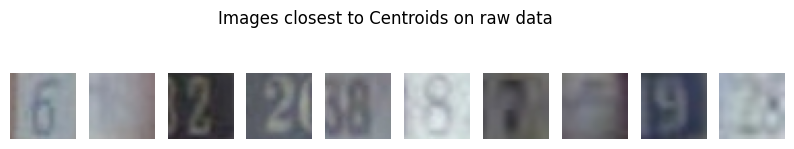

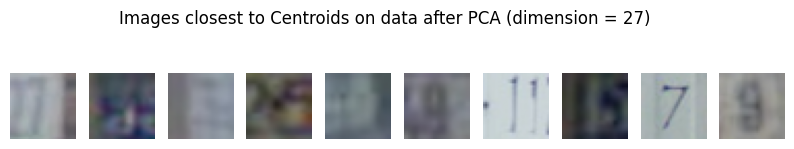

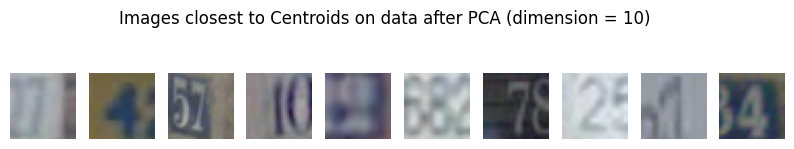

In [13]:
# To get images closest to the centroid

# Function to display image closest to centroid
def get_image(cluster_centers, title):
    fig, axes = plt.subplots(1, len(cluster_centers), figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(cluster_centers[i].reshape(32, 32, 3))
        ax.axis('off')
    fig.suptitle(title)
    plt.show()

# For raw data
tr_closest_raw = pairwise_distances_argmin_min(tr_kmeans_raw.cluster_centers_, train_raw)[0]
get_image(train_images[tr_closest_raw], 'Images closest to Centroids on raw data')

# For data after PCA (dimension = 27)
tr_closest_pca1 = pairwise_distances_argmin_min(tr_kmeans_pca1.cluster_centers_, train_pca1)[0]
get_image(train_images[tr_closest_pca1], 'Images closest to Centroids on data after PCA (dimension = 27)')

# For data after PCA (dimension = 10)
tr_closest_pca2 = pairwise_distances_argmin_min(tr_kmeans_pca2.cluster_centers_, train_pca2)[0]
get_image(train_images[tr_closest_pca2], 'Images closest to Centroids on data after PCA (dimension = 10)')

In [14]:
# QUESTION 2(b)

# Find the sum squared error for each of these different clustering obtained in 2 (a). 
# Make use of the label information associated with the images to evaluate your clustering.
# Specifically, evaluate the goodness of your clusters for various cases in 2 (a) by using two evaluation metrics purity and rand-index.

In [15]:
# Calculating the Sum Squared Error

# For raw data
print(f"Sum Squared Error for k-means on raw data: {tr_kmeans_raw.inertia_}")

# For data after PCA (dimension = 27)
print(f"Sum Squared Error for k-means on data obtained after PCA (dimension = 27): {tr_kmeans_pca1.inertia_}")

# For data after PCA (dimension = 10)
print(f"Sum Squared Error for k-means on data obtained after PCA (dimension = 10): {tr_kmeans_pca2.inertia_}")

Sum Squared Error for k-means on raw data: 81147712142.71567
Sum Squared Error for k-means on data obtained after PCA (dimension = 27): 23964019.09271054
Sum Squared Error for k-means on data obtained after PCA (dimension = 10): 17715778.88942662


In [17]:
# Evaluating the goodness of the clusters

# Function to calculate purity and rand-index
def evaluation_metric(true_labels, predicted_labels):
    # Purity
    contingency = contingency_matrix(true_labels, predicted_labels)
    purity = np.sum(np.amax(contingency, axis=1)) / np.sum(contingency)

    # Rand-Index
    rand_index = adjusted_rand_score(true_labels, predicted_labels)

    return purity, rand_index


# For raw data
purity, rand_index = evaluation_metric(true_labels, tr_kmeans_raw.labels_)
print(f"Purity for k-means on raw data: {purity}")
print(f"Rand Index for k-means on raw data: {rand_index}")

# For data after PCA (dimension = 27)
purity, rand_index = evaluation_metric(true_labels, tr_kmeans_pca1.labels_)
print(f"Purity for k-means on data after pca (dimension = 27): {purity}")
print(f"Rand Index for k-means on data after pca (dimension = 27): {rand_index}")

# For data after PCA (dimension = 10)
purity, rand_index = evaluation_metric(true_labels, tr_kmeans_pca2.labels_)
print(f"Purity for k-means on data after pca (dimension = 10): {purity}")
print(f"Rand Index for k-means on data after pca (dimension = 10): {rand_index}")

Purity for k-means on raw data: 0.14504
Rand Index for k-means on raw data: 0.0003996101537065961
Purity for k-means on data after pca (dimension = 27): 0.14864
Rand Index for k-means on data after pca (dimension = 27): 0.0004571894467734864
Purity for k-means on data after pca (dimension = 10): 0.13852
Rand Index for k-means on data after pca (dimension = 10): 0.00041054370762459735


In [18]:
# Question 2(c)

# If you label each cluster with the digit that occurs most frequently within it, then what is
# your classification accuracy with this unsupervised method for various cases ? 
# How does this compare with the accuracy you got with the K-NN classifier in Q1 (c) ?

In [19]:
# Performing k-means for the test data for k=10

# On raw data
test_kmeans_raw = KMeans(n_clusters=10, random_state=42, n_init='auto')
test_kmeans_raw.fit(test_raw)

# On data after PCA (dimension = 27)
test_kmeans_pca1 = KMeans(n_clusters=10, random_state=42, n_init='auto')
test_kmeans_pca1.fit(test_pca1)

# On data after PCA (dimension = 10)
test_kmeans_pca2 = KMeans(n_clusters=10, random_state=42, n_init='auto')
test_kmeans_pca2.fit(test_pca2)

KMeans(n_clusters=10, n_init='auto', random_state=42)

In [20]:
# Function which assigns most frequent label to each cluster
def frequent_label(predicted_labels, true_labels):
    uni = np.unique(predicted_labels)
    labels = np.zeros_like(predicted_labels)

    for value in uni:
        ind = (predicted_labels == value)
        frequent_label = np.argmax(np.bincount(true_labels[ind]))
        labels[ind] = frequent_label

    return labels

In [21]:
# Calculating accuracy


# On raw data
predicted_labels = frequent_label(test_kmeans_raw.labels_, test_true_labels)
print(f"Accuracy for k-means on raw data: {accuracy_score(test_true_labels, predicted_labels)}")

# On data after PCA (dimension = 27)
predicted_labels = frequent_label(test_kmeans_pca1.labels_, test_true_labels)
print(f"Accuracy for k-means on data after PCA (dimension = 27): {accuracy_score(test_true_labels, predicted_labels)}")

# On data after PCA (dimension = 10)
predicted_labels = frequent_label(test_kmeans_pca2.labels_, test_true_labels)
print(f"Accuracy for k-means on data after PCA (dimension = 10): {accuracy_score(test_true_labels, predicted_labels)}")

Accuracy for k-means on raw data: 0.19925476336816225
Accuracy for k-means on data after PCA (dimension = 27): 0.1991779348494161
Accuracy for k-means on data after PCA (dimension = 10): 0.19821757836508913


In [22]:
# Observations

# Comparing the results, we can see that the accuracy of k-NN is better than the accuracy of k-means.
# This can be explained on the fact that for labeled data and the task of classification, k-NN is suitable choice.

In [23]:
# Question 2(d)

# Perform k means clustering with k=5 on data obtained after PCA dimensionality
# reduction for dimension as found in question 1 (a). Find the sum squared error for each
# of these cases. Do you observe images from different classes to be clustered together ?
# which all classes do you find are getting clustered together.

In [24]:
# Performing k-means with k=5 on PCA reduced data. (dimension = 27)
tr_kmeans_pca3 = KMeans(n_clusters=5, random_state=42, n_init=10)
tr_kmeans_pca3.fit(train_pca1)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [25]:
# Calculating the sum squared error
print(f"Sum Squared Error for k-means with k=5 on data obtained after PCA (dimension = 27): {tr_kmeans_pca3.inertia_}")

Sum Squared Error for k-means with k=5 on data obtained after PCA (dimension = 27): 27759139.44943675


In [26]:
distribution(tr_kmeans_pca3.labels_, true_labels, 5)

Cluster 0 - Class Distribution: {0: 726, 1: 696, 2: 687, 3: 752, 4: 735, 5: 730, 6: 707, 7: 684, 8: 748, 9: 768}
Cluster 1 - Class Distribution: {0: 227, 1: 215, 2: 194, 3: 232, 4: 223, 5: 214, 6: 237, 7: 190, 8: 227, 9: 207}
Cluster 2 - Class Distribution: {0: 484, 1: 472, 2: 508, 3: 414, 4: 448, 5: 428, 6: 436, 7: 478, 8: 436, 9: 415}
Cluster 3 - Class Distribution: {0: 618, 1: 635, 2: 627, 3: 610, 4: 596, 5: 600, 6: 623, 7: 607, 8: 615, 9: 631}
Cluster 4 - Class Distribution: {0: 445, 1: 482, 2: 484, 3: 492, 4: 498, 5: 528, 6: 497, 7: 541, 8: 474, 9: 479}


In [28]:
# Observation

# From the true class labels distribution within each cluster as shown, we can see that different classes are getting
# clustered together. In fact, in each cluster, there is a finite proportion from every digit from 0 to 9.
# Cluster label 0 : 9
# Cluster label 1 : 6
# Cluster label 2 : 2
# Cluster label 3 : 1
# Cluster label 4 : 7